In [9]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline
%load_ext autotime

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 7.13 ms


# Problem 1 (K-means)

In [2]:
np.random.seed(42)

N = 500
weights = [0.2, 0.5, 0.3]
mean = np.array([[0,0], [3,0], [0,3]])
cov = np.array([[1,0],[0,1]])

data =  np.empty((0,2), int)
index = np.random.choice([0,1,2], N, p= weights)

for i in index:
    sample = np.random.multivariate_normal(mean[index[i]], cov, 1)
    data = np.append(data, sample, axis=0)

time: 122 ms


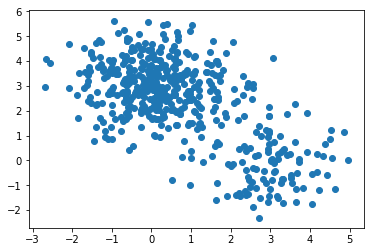

time: 290 ms


In [3]:
plt.scatter(data[:,0],data[:,1])

### K-means funcitons

In [4]:
def initialize_centroids(data, k):
    """returns k centroids from the initial points"""
    centroids = data.copy()
    np.random.shuffle(centroids)
    return centroids[:k]

time: 2.9 ms


In [5]:
def kmeans(data, k, centroids, iteration):

    L = []
    centroids_array = np.zeros([0,2])
    for i in range(iteration+1):
        distance = np.zeros([data.shape[0],])
        n = np.zeros([1,])

        for i in range(k):
            d = np.linalg.norm((data - centroids[i,:]), axis=1)
            distance = np.vstack((distance, d))
        distance = np.delete(distance, (0), axis=0)

        for i in np.arange(500):
            a = np.where(distance[:,i] == distance[:,i].min())[0]
            n = np.vstack((n,a))
        n = np.delete(n, (0), axis=0)
        n = n.reshape(500,)

        centroids = np.array([data[n==k].mean(axis=0) for k in range(centroids.shape[0])])
#         centroids_array = np.vstack((centroids_array, centroids))

        L.append(np.sum([np.sum(np.linalg.norm((data[n==k] - centroids[k]), axis=1), axis=0) for k in range(centroids.shape[0])]))
        
    return n, centroids, L

time: 22.9 ms


In [6]:
centroids = initialize_centroids(data, 5)

clusters_5, centroids_poisition_5, L_5 = kmeans(data,5, centroids, 20)
clusters_4, centroids_poisition_4, L_4 = kmeans(data,4, centroids, 20)
clusters_3, centroids_poisition_3, L_3 = kmeans(data,3, centroids, 20)
clusters_2, centroids_poisition_2, L_2 = kmeans(data,2, centroids, 20)

/Users/Amiros/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)
/Users/Amiros/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:68: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


time: 630 ms


## 1-a

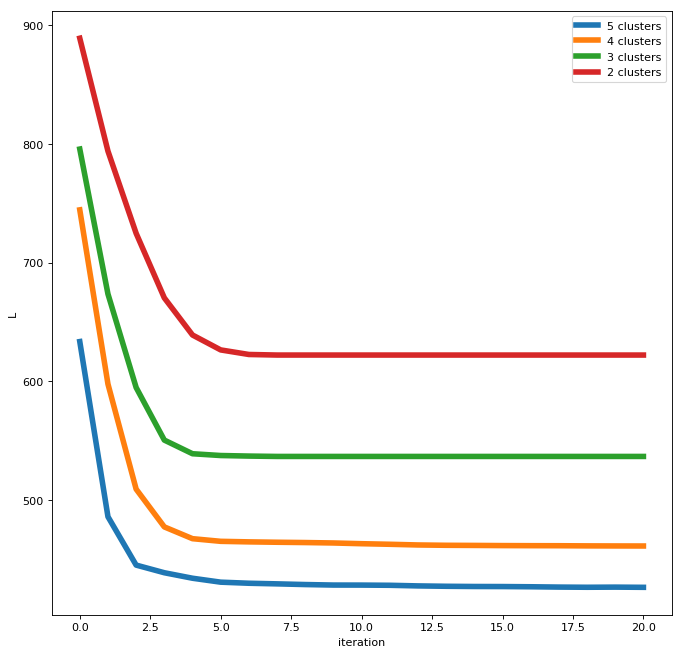

time: 388 ms


In [7]:
plt.figure(num=None, figsize=(10, 10), dpi=80)

plt.plot(L_5, label="5 clusters", linewidth=5)
plt.plot(L_4, label="4 clusters", linewidth=5)
plt.plot(L_3, label="3 clusters", linewidth=5)
plt.plot(L_2, label="2 clusters", linewidth=5)

plt.xlabel("iteration")
plt.ylabel("L")
plt.legend(loc=1)

## 1-b

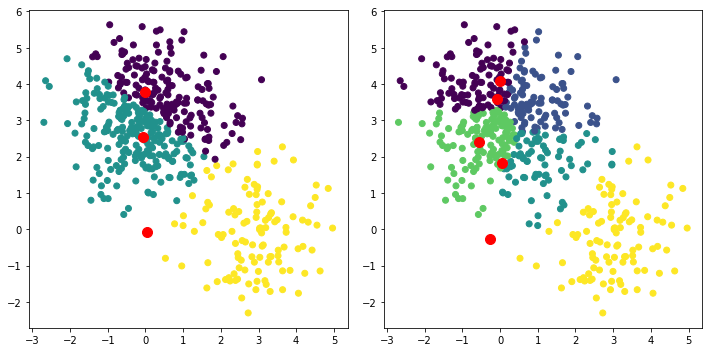

time: 538 ms


In [8]:
fig, ax = plt.subplots(1, 2, figsize=(10,5))
figsize=(15, 10)
ax[1].scatter(data[:, 0], data[:, 1], c=clusters_5)
ax[1].scatter(centroids[:, 0], centroids_poisition_5[:, 1], c='r', s=100)

ax[0].scatter(data[:, 0], data[:, 1], c=clusters_3)
ax[0].scatter(centroids[:, 0], centroids_poisition_3[:, 1], c='r', s=100)
fig.tight_layout()

# Problem 2 (Matrix factorization)

In [10]:
#load train data as numpy array
X = np.genfromtxt('/Users/Amiros/GitHub/Machine Learning for Data Science/hw4-kmeans/data/ratings.csv', 
          delimiter=',')
y = np.genfromtxt('/Users/Amiros/GitHub/Machine Learning for Data Science/hw4-kmeans/data/ratings_test.csv', 
          delimiter=',')

time: 611 ms


In [11]:
X_sorted = X[X[:,0].argsort()]
y_sorted = y[y[:,0].argsort()]

time: 24.6 ms


In [12]:
## 943 users on 1682 items

# problem intialization
d = 10
lmbda = 1
variance = 0.25
steps = 100

# number of users
N_1 = np.unique(X[:,0]).shape[0]
u = np.random.randn(N_1, d)

# number of movies
N_2 = np.unique(X[:,1]).shape[0]
v = np.random.randn(N_2, d)

M = u.dot(v.T)

time: 39.4 ms


In [16]:
# the index set of objects rated by user i
movies_for_each_u = [np.where(i==X_sorted[:,0]) for i in np.unique(X_sorted[:,0])]

objects_rated_by_u = []
for i in range(N_1):
    dict_u = {
        'user_id': i+1,
        'rated_movies': np.take(X[:,1], movies_for_each_u[i][0])
    }
    dict_u['rated_movies'] = dict_u['rated_movies'].astype(int)
    objects_rated_by_u.append(dict_u)
    
# the index set of users who rated object j
users_for_each_v = [np.where(i==X_sorted[:,1]) for i in np.unique(X_sorted[:,1])]

users_who_rated_v = []
for i in range(N_2):
    dict_v = {
        'movie_id': i+1,
        'users_who_rated': np.take(X[:,1], users_for_each_v[i][0])
    }
    dict_v['users_who_rated'] = dict_v['users_who_rated'].astype(int) 
    users_who_rated_v.append(dict_v)

time: 1.21 s


In [172]:
#for user = 0
v_j = v[objects_rated_by_u[0]['rated_movies'],:]

v_v_transpose = 0
M_dot_v = 0

for i in range(v_j.shape[0]):
    v_v_transpose += np.outer(v_j[i], v_j[i].T)

    M_dot_v += np.dot(v[objects_rated_by_u[0]['rated_movies'][i],:], v_j[i]) * v_j[i]
u_new = np.linalg.inv((lmbda * variance * np.eye(d)) + v_v_transpose).dot(M_dot_v)

time: 11.7 ms


In [183]:
# u_updated = np.empty((1,10))
#    u_updated = np.append(u_updated, u_new.reshape(1,-1), axis=0)

# v[objects_rated_by_u[3]['rated_movies'],:].shape

(1676, 10)

time: 4.12 ms


In [8]:
#for user = 0
v_j = v[objects_rated_by_u[0]['rated_movies'],:]


v_v_transpose = 0
M_dot_v = 0

u_updated = np.empty((1,10))

for i in range(v_j.shape[0]):
    v_v_transpose += np.outer(v_j[i], v_j[i].T)

    M_dot_v = np.dot(v[objects_rated_by_u[0]['rated_movies'][i],:], v_j[i]) * v_j[i]
    u_new = np.linalg.inv((lmbda * variance * np.eye(d)) + v_v_transpose).dot(M_dot_v)
    u_updated = np.append(u_updated, u_new.reshape(1,-1), axis=0)

time: 21.8 ms


In [191]:
########################### new approach

time: 974 Âµs


In [229]:
import pandas as pd
df = pd.DataFrame(X)
df = df.pivot(index= 0, columns=1, values=2)
df.shape

(943, 1676)

time: 96.1 ms


array([], shape=(0, 2), dtype=int64)

time: 17.6 ms


<bound method DataFrame.dropna of 1       1.0      2.0      3.0      4.0      5.0      6.0      7.0      8.0     \
0                                                                               
1.0    1.46960 -0.53039  0.46961 -0.53039 -0.53039  1.46960  0.46961 -2.53040   
2.0    0.46961      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
3.0        NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
4.0        NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
5.0    0.46961 -0.53039      NaN      NaN      NaN      NaN      NaN      NaN   
6.0        NaN      NaN      NaN      NaN      NaN      NaN -1.53040      NaN   
7.0        NaN      NaN      NaN  1.46960      NaN      NaN  1.46960  1.46960   
8.0        NaN      NaN      NaN      NaN      NaN      NaN -0.53039      NaN   
9.0        NaN      NaN      NaN      NaN      NaN  1.46960  0.46961      NaN   
10.0   0.46961      NaN      NaN  0.46961      NaN      NaN  0.46961      N

time: 43 ms
